# Capstone Project: Exploratory Data Analysis

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)

### Reading in CSV

In [2]:
capstone_df = pd.read_csv("../data/location_with_google_ratings.csv")

In [3]:
capstone_df.head()

,area,county,city_or_town,lat_area,long_area,population,median_household_income,income_per_capita,name,address,lat_venue,long_venue,categories,price_level,rating,user_ratings_total
0,Alameda,Alameda,City,37.734379,-122.23952,77624,104756,52448,Chuck Corica Golf Complex,1 Clubhouse Memorial Rd,37.738885,-122.234326,Golf Course,0.0,0.0,0.0
1,Alameda,Alameda,City,37.734379,-122.23952,77624,104756,52448,Shoreline Park,"Alameda, CA",37.742580,-122.250126,Park,0.0,0.0,0.0
2,Alameda,Alameda,City,37.734379,-122.23952,77624,104756,52448,Angel Fish Japanese Cuisine,883 C-2 Island Dr,37.737478,-122.240107,Japanese Restaurant,2.0,4.3,112.0
3,Alameda,Alameda,City,37.734379,-122.23952,77624,104756,52448,La Penca Azul,891 Island Dr Ste B (at Mecartney Rd),37.737667,-122.240767,Mexican Restaurant,2.0,4.3,2263.0
4,Alameda,Alameda,City,37.734379,-122.23952,77624,104756,52448,La Val's Pizza,891 Island Dr,37.737610,-122.241001,Italian Restaurant,2.0,4.4,190.0


### Mapping

In [4]:
## Map showing density (size based on population)

plot = px.scatter_geo(capstone_df, 
                      lat = "lat_area",
                      lon = "long_area",
                      scope="usa",
                      size="population",
                      color = "area")
plot.show()

In [5]:
## To show map of all venues per category in the area (potentially size based on rating)
plot = px.scatter_geo(capstone_df, 
                      lat = "lat_venue",
                      lon = "long_venue",
                      scope="usa",
                      color = "categories")
plot.show()

#### Coffee Shop based on Area

In [6]:
plot = px.scatter_geo(capstone_df[capstone_df["categories"] == "Coffee Shop"], 
                      lat = "lat_venue",
                      lon = "long_venue",
                      scope="usa",
                      size="rating",
                      color = "area")
plot.show()

### Income Distribution

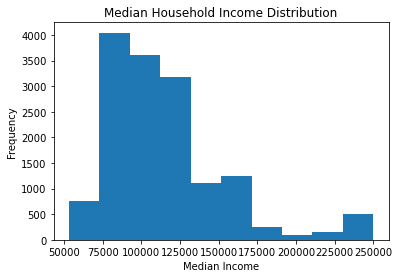

In [7]:
plt.hist(capstone_df["median_household_income"])
plt.title("Median Household Income Distribution")
plt.xlabel("Median Income")
plt.ylabel("Frequency");

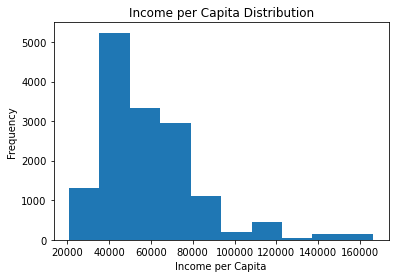

In [8]:
plt.hist(capstone_df["income_per_capita"])
plt.title("Income per Capita Distribution")
plt.xlabel("Income per Capita")
plt.ylabel("Frequency");

### Categorical Analysis

In [9]:
df_categorical = pd.DataFrame(capstone_df["categories"].value_counts().head(20))

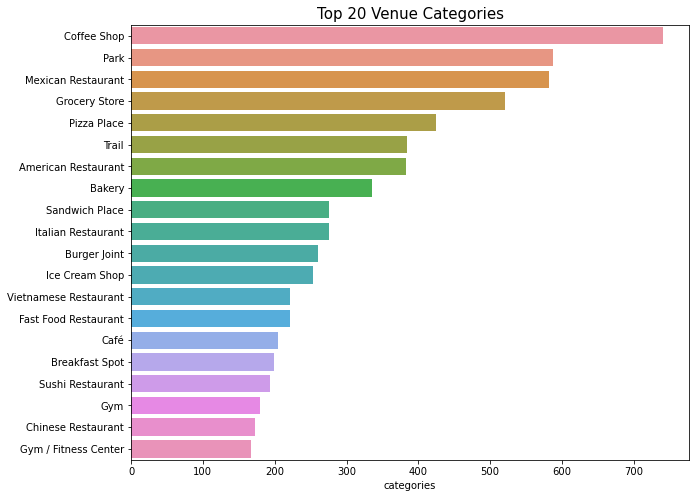

In [10]:
plt.figure(figsize=(10,8))

sns.barplot(x=df_categorical["categories"],y=df_categorical.index)
plt.title("Top 20 Venue Categories", size=15);

### Price Level, Rating and User Rating Overall vs Coffee Shops

In [11]:
def boxplot(column_name,title):
    fig, ax = plt.subplots()
    columns = [capstone_df[column_name], capstone_df[capstone_df["categories"] == "Coffee Shop"][column_name]]
    ax.boxplot(columns, patch_artist=True, meanline=True, showmeans=True)
    plt.title(title)
    plt.xticks([1, 2], ["All Venues", "Coffee Shops"])
    plt.show()

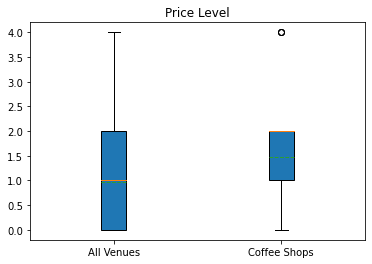

In [12]:
boxplot("price_level","Price Level")

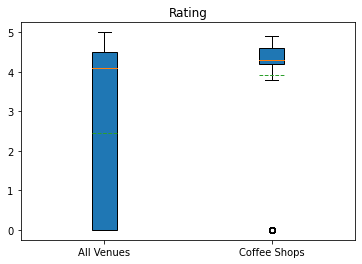

In [13]:
boxplot("rating","Rating")

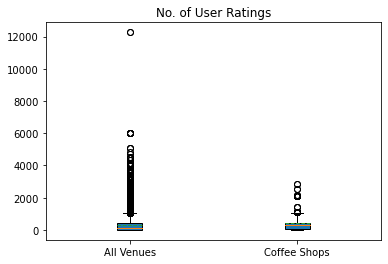

In [14]:
boxplot("user_ratings_total","No. of User Ratings")

### Coffee Shop Analysis

In [15]:
def bar(x,y,title,w,h):
    plt.figure(figsize=(w,h)) 
    sns.barplot(x=x,y=y)
    plt.title(title, size=15);

#### Number of Recommended Coffee Shop per Area

In [16]:
coffee_shop_area = pd.DataFrame(capstone_df[capstone_df["categories"] == "Coffee Shop"].groupby("area")["name"].count())

In [17]:
coffee_shop_area.sort_values("name", ascending = False, inplace = True)

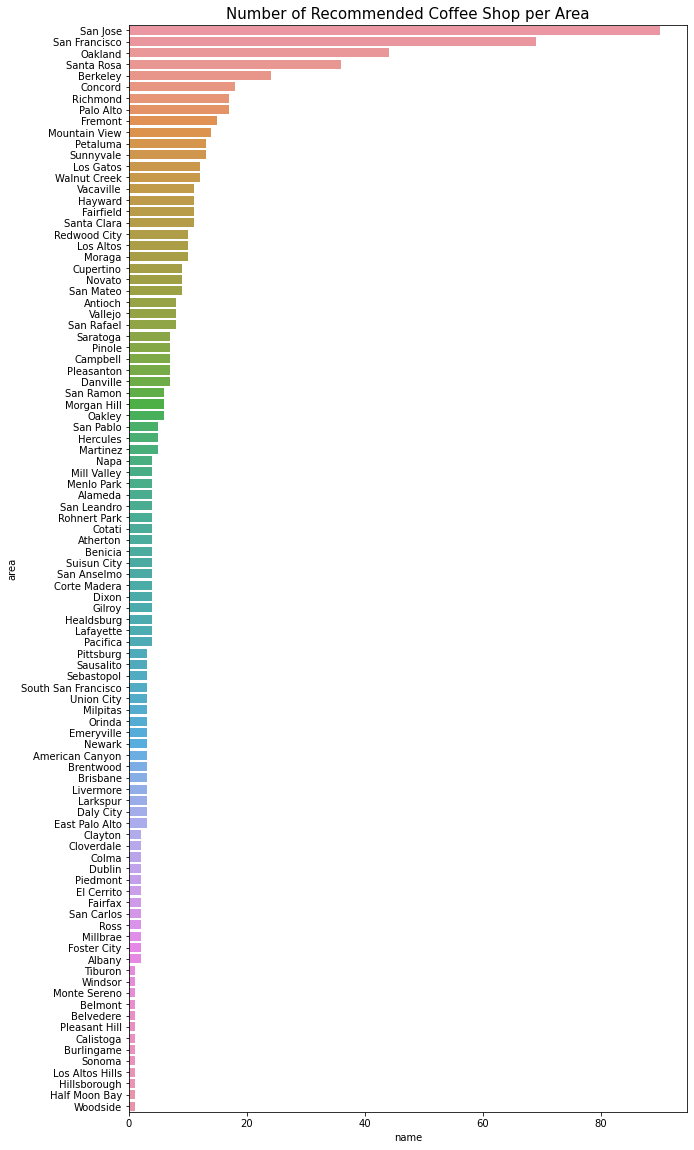

In [18]:
bar(coffee_shop_area["name"],
    coffee_shop_area.index,
    "Number of Recommended Coffee Shop per Area",
    10,
    20)
   

#### Coffee Shop by Brand

In [19]:
coffee_shop_by_brand = pd.DataFrame(capstone_df[capstone_df["categories"] == "Coffee Shop"]["name"].value_counts())

In [20]:
coffee_shop_by_brand["cat"] = coffee_shop_by_brand["name"].map(lambda x: coffee_shop_by_brand[coffee_shop_by_brand["name"] == x].index[0] if x > 5 else "Coffee Shop with < 5 Branches")

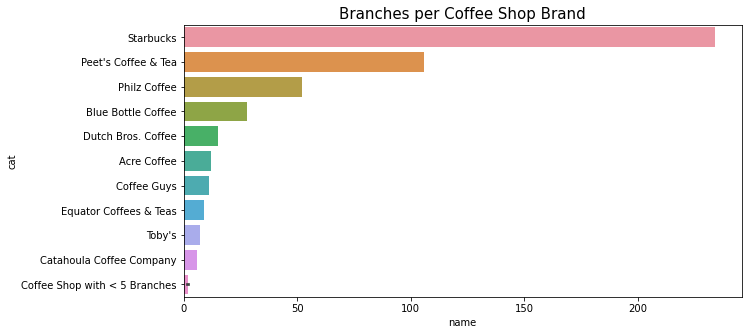

In [21]:
bar(coffee_shop_by_brand["name"],
    coffee_shop_by_brand["cat"],
    "Branches per Coffee Shop Brand",
    10,
    5)

#### Coffee Shop per Population

In [22]:
rec_coffee_shop_per_pop = pd.DataFrame(capstone_df[capstone_df["categories"] == "Coffee Shop"].groupby("area")["name"].count() / capstone_df[capstone_df["categories"] == "Coffee Shop"].groupby("area")["population"].unique())

In [23]:
rec_coffee_shop_per_pop["shop_per_pop"] = rec_coffee_shop_per_pop.iloc[:, 0].map(lambda x: x[0])

In [24]:
rec_coffee_shop_per_pop.sort_values("shop_per_pop", ascending = False, inplace = True)

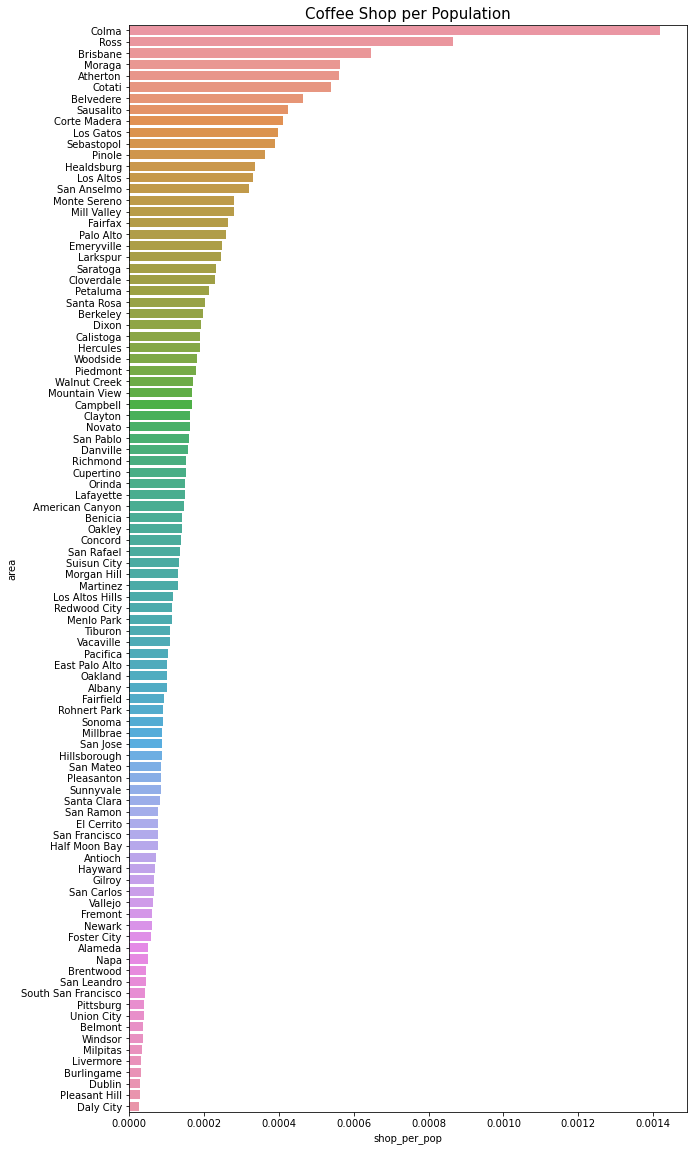

In [25]:
bar(rec_coffee_shop_per_pop["shop_per_pop"],
    rec_coffee_shop_per_pop.index,
    "Coffee Shop per Population",
    10,
    20)

#### Average Coffee Shop Rating per Area

In [26]:
avg_rate_per_area = pd.DataFrame(capstone_df[capstone_df["categories"] == "Coffee Shop"].groupby("area")["rating"].mean())

In [27]:
avg_rate_per_area.sort_values("rating",ascending = False, inplace = True)

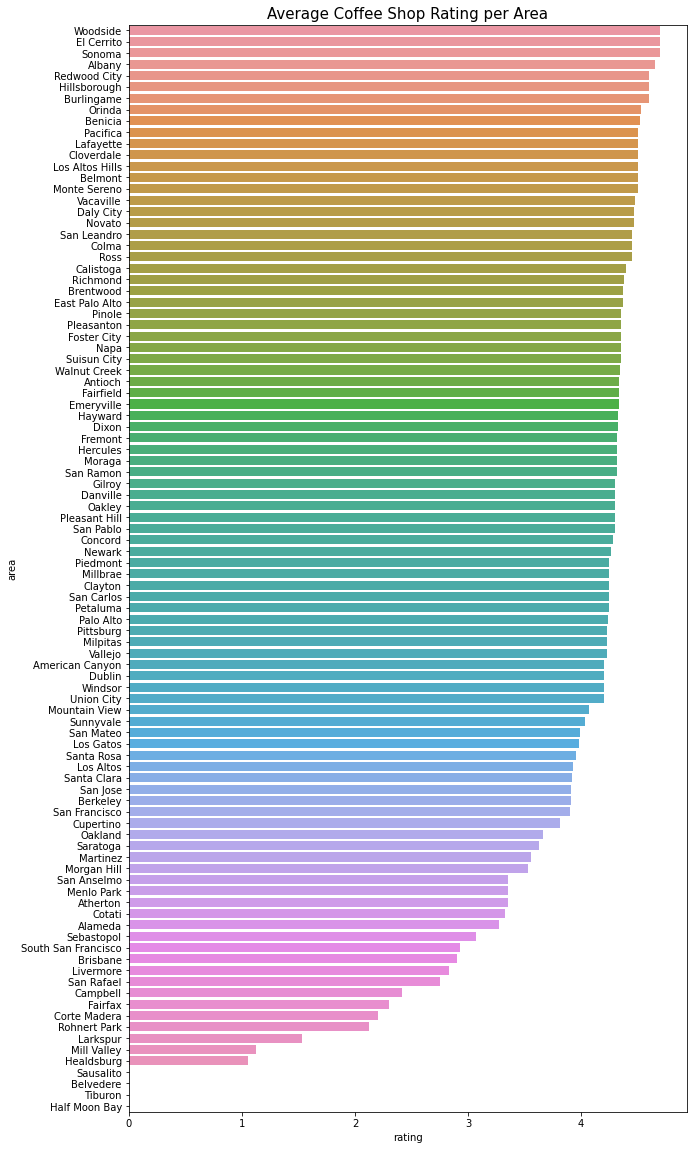

In [28]:
bar(avg_rate_per_area["rating"],
    avg_rate_per_area.index,
    "Average Coffee Shop Rating per Area",
    10,
    20)

#### Average Coffee Shop Price Level

In [29]:
avg_pl_per_area = pd.DataFrame(capstone_df[capstone_df["categories"] == "Coffee Shop"].groupby("area")["price_level"].mean())

In [30]:
avg_pl_per_area.sort_values("price_level",ascending = False, inplace = True)

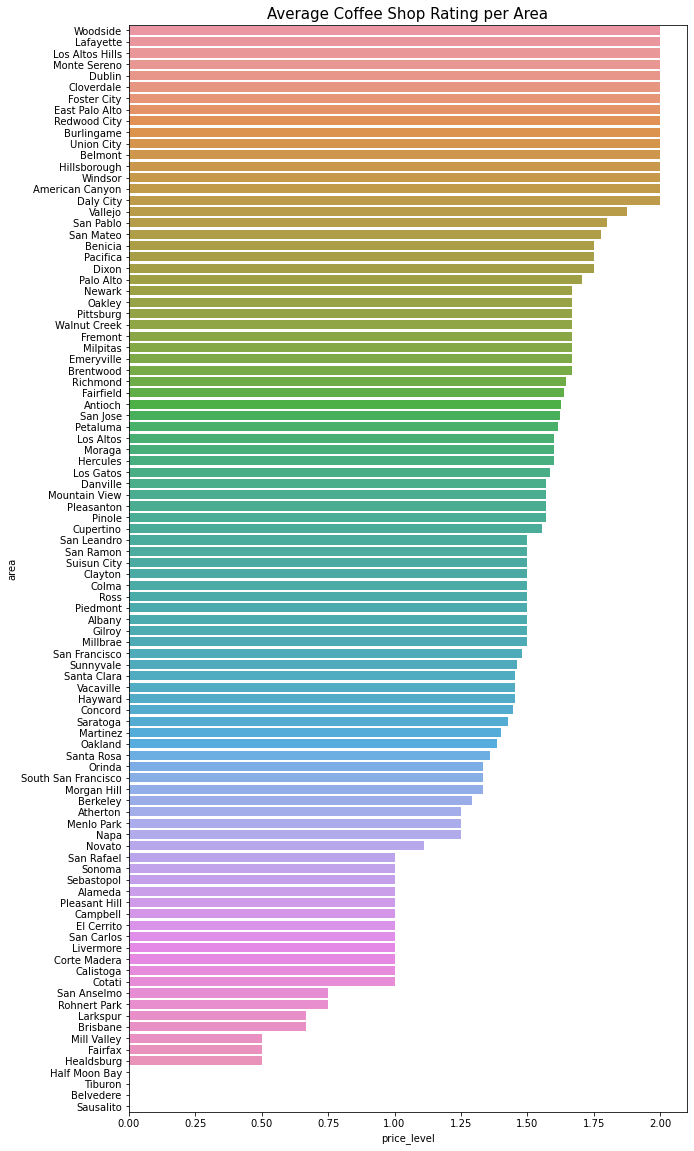

In [31]:
bar(avg_pl_per_area["price_level"],
    avg_pl_per_area.index,
    "Average Coffee Shop Rating per Area",
    10,
    20)